In [2]:
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata('MNIST original')

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [5]:
x,y = mnist['data'],mnist['target']

In [7]:
y.shape

(70000,)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [24]:
some_digit = x[36000]
some_digit_image = some_digit.reshape(28,28)


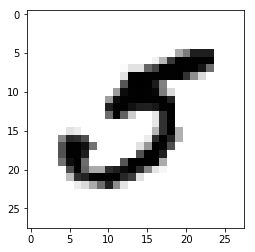

In [25]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation = 'nearest')

In [26]:
y[36000]

5.0

In [27]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [34]:
import numpy as np

In [37]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Training a binary classifier

For now we are only modelling a 5 classifier it will only classify 5 or not 5

In [38]:
y_train_5 = (y_train==5) #true for all 5's, false for every other digits 
y_test_5 = (y_test==5)

##### Stochastic Gradient Descent (SGD) Classifier

In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [48]:
sgd_clf.predict([some_digit])

array([ True])

##### Measuring accuracy using crossvalidation

Implementing Crossvalidation

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [59]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [74]:
for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train_5[train_index]
    x_test_folds = x_train[test_index]
    y_test_folds = y_train_5[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9384


/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96495


/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9557


In [75]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(sgd_clf, x_train, y_train_5, cv = 3, scoring = 'accuracy')

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

array([0.93755, 0.96315, 0.9557 ])

In [79]:
from sklearn.model_selection import cross_val_predict

In [81]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3)

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

Just	like	the	 cross_val_score() 	function,	 cross_val_predict() 	performs	K-fold	cross-validation,
but	instead	of	returning	the	evaluation	scores,	it	returns	the	predictions	made	on	each	test	fold.	This	means
that	you	get	a	clean	prediction	for	each	instance	in	the	training	set	(“clean”	meaning	that	the	prediction	is
made	by	a	model	that	never	saw	the	data	during	training).

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54296,   283],
       [ 2589,  2832]])

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [88]:
precision_score(y_train_5, y_train_pred)

0.9091492776886035

In [89]:
recall_score(y_train_5, y_train_pred)

0.5224128389596016

In [90]:
f1_score(y_train_5, y_train_pred)

0.6635426429240863

In [94]:
y_scores

array([19924.61783236])

In [105]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3, method = 'decision_function')

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

In [106]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [127]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds, recalls[:-1],"g-",label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc='best')
    plt.ylim([0,1])
    plt.xlim([-650000,650000])

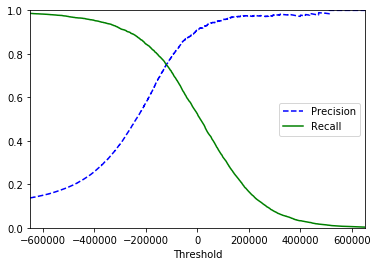

In [128]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [138]:
y_train_pred_90 = (y_scores>10000)
recall_score(y_train_5, y_train_pred_90)

0.5013835085777532

##### The ROC Curve (Reciever Operating Characterstic)
The	receiver	operating	characteristic	(ROC)	curve	is	another	common	tool	used	with	binary	classifiers.
It	is	very	similar	to	the	precision/recall	curve,	but	instead	of	plotting	precision	versus	recall,	the	ROC
curve	plots	the	true	positive	rate	(another	name	for	recall)	against	the	false	positive	rate.	The	FPR	is	the
ratio	of	negative	instances	that	are	incorrectly	classified	as	positive.	It	is	equal	to	one	minus	the	true
negative	rate,	which	is	the	ratio	of	negative	instances	that	are	correctly	classified	as	negative.	The	TNR
is	also	called	specificity.	Hence	the	ROC	curve	plots	sensitivity	(recall)	versus	1	–	specificity.
To	plot	the	ROC	curve,	you	first	need	to	compute	the	TPR	and	FPR	for	various	threshold	values,	using	the
roc_curve() 	function:

In [140]:
from sklearn.metrics import roc_curve

In [141]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

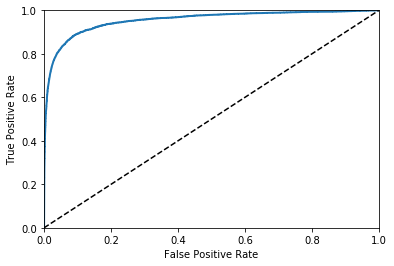

In [151]:
def	plot_roc_curve(fpr,	tpr,	label=None):
				plt.plot(fpr,	tpr,	linewidth=2,	label=label)
				plt.plot([0,	1],	[0,	1],	'k--')
				plt.axis([0,	1,	0,	1])
				plt.xlabel('False Positive Rate')
				plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,	tpr)
plt.show()

In [144]:
from sklearn.metrics import roc_auc_score

In [146]:
roc_auc_score(y_train_5, y_scores)

0.9543293913043208

##### Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")
y_train_predict_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3)

In [149]:
y_scores_forest = y_probas_forest[:, 1]           # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

/home/ea/.local/lib/python3.5/site-packages/matplotlib/legend.py:493: UserWarning: Unrecognized location "lower	right". Falling back on "best"; valid locations are
	lower right
	lower center
	center
	center right
	upper center
	best
	center left
	right
	upper right
	lower left
	upper left

  % (loc, '\n\t'.join(self.codes)))


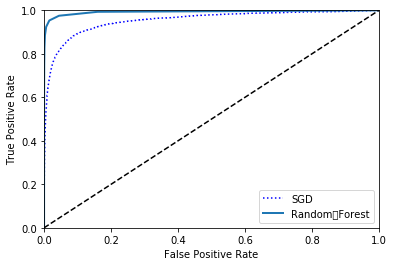

In [152]:
plt.plot(fpr,	tpr,	"b:",	label="SGD")
plot_roc_curve(fpr_forest,	tpr_forest,	"Random	Forest")
plt.legend(loc="lower	right")
plt.show()

In [153]:
roc_auc_score(y_train_5,	y_scores_forest)

0.9929262717288548

In [157]:
f1_score(y_train_5, y_train_predict_forest)

0.9001505268439538

## Multiclass Classification

##### SGD Classifier

In [167]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [168]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -45533.95992977, -460565.93387007, -277383.07508098,
        -130654.16610875, -242117.34865852,   19924.61783236,
        -823120.67598977, -326798.80796809, -637837.84336041,
        -647568.0215216 ]])

In [169]:
np.argmax(some_digit_scores)

5

In [170]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [171]:
sgd_clf.classes_[5]

5.0

In [174]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(x_train,y_train)
ovo_clf.predict([some_digit])


/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

array([3.])

##### Random Forest Classifier

In [176]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [177]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [181]:
cross_val_score(sgd_clf, x_train, y_train, cv = 3, scoring = "accuracy")
#cross_val_score(forest_clf, x_train, y_train, cv = 3, scoring = "accuracy")

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

array([0.86252749, 0.86629331, 0.81822273])

In [182]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv = 3, scoring = 'accuracy')

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

array([0.91216757, 0.91019551, 0.90683603])

In [186]:
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ea/.local/lib/python3.5/

array([[5741,    3,   26,   11,   11,   42,   39,    9,   37,    4],
       [   2, 6487,   48,   25,    5,   43,    8,    9,  103,   12],
       [  53,   37, 5342,  104,   89,   26,   80,   58,  154,   15],
       [  49,   40,  136, 5341,    3,  231,   34,   61,  140,   96],
       [  20,   28,   38,    9, 5357,   11,   53,   32,   80,  214],
       [  74,   37,   34,  181,   74, 4592,  117,   35,  188,   89],
       [  37,   22,   47,    1,   48,   80, 5636,    6,   41,    0],
       [  19,   24,   72,   30,   51,   11,    7, 5815,   13,  223],
       [  54,  164,   75,  145,   12,  147,   57,   30, 5028,  139],
       [  38,   31,   30,   88,  169,   40,    2,  226,   80, 5245]])

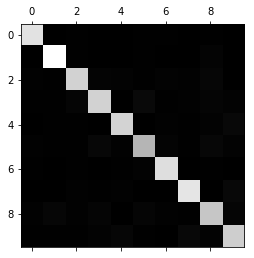

In [190]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [194]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

In [195]:
np.fill_diagonal(norm_conf_mx, 0)

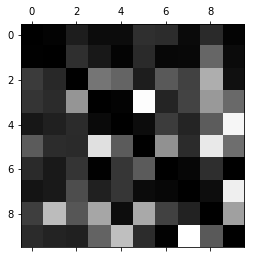

In [197]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [204]:
from	sklearn.neighbors	import	KNeighborsClassifier
y_train_large	=	(y_train	>=	7)
y_train_odd	=	(y_train	%	2	==	1)
y_multilabel	=	np.c_[y_train_large,	y_train_odd]
knn_clf	=	KNeighborsClassifier()
knn_clf.fit(x_train,	y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [205]:
knn_clf.predict([some_digit])

array([[False,  True]])